In [1]:
#$
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

## Load Data

In [2]:
#$
df = pd.read_csv('historic_events.csv',header=0, names=['event','year','type'])

In [3]:
df.head(10)

,event,year,type
0,Thales,-624,birth
1,Pythagoras,-570,birth
2,Cyrus the Great,-559,birth
3,Darius I,-522,birth
4,Xerxes I,-486,birth
5,Leonidas,-480,birth
6,Socrates,-470,birth
7,Plato,-427,birth
8,Euclid,-300,birth
9,Aristotle,-384,birth


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   event   210 non-null    object
 1   year    210 non-null    int64 
 2   type    210 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.0+ KB


## Calcualte y

In [5]:
#$
# add a column names y
df['y'] = 1
# This columns is 1 for unique years
# for years that happened more than once, it is an index for each occurence
# so the first time it appears its 1, the second time its 2, etc
df['y'] = df.groupby('year').cumcount() + 1

In [6]:
df.sort_values(by=['y'], ascending=False).head()

,event,year,type,y
172,PHP,1995,programming language,6
185,Typescript,2012,programming language,5
171,Javascript,1995,programming language,5
170,Ruby,1995,programming language,4
179,Node.js,2009,programming language,4


## Plot using Matplotlib

<Axes: xlabel='year', ylabel='y'>

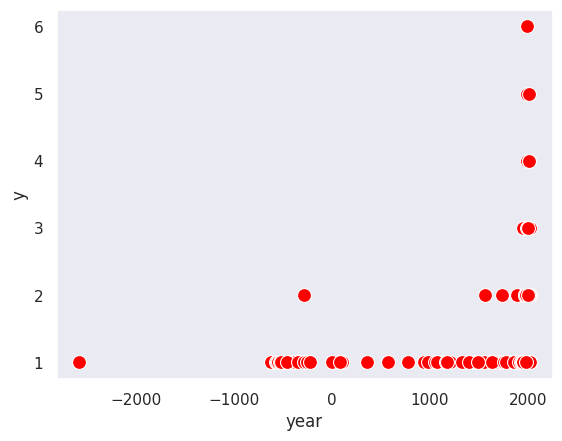

In [7]:
#$
sns.scatterplot(x='year', y='y', data=df, s=100, color='red')

## Plot using Plotly

In [8]:
#$
pd.options.plotting.backend = "plotly"

# Plot the timeline
# X axis is the year, Y axis is the y column, which is the index for each occurence
# of the same year, Color is the type of event, Each event is labeled with the event name
# labels should be vertical
fig = df.plot.scatter(x='year', y='y', c='type', text='event')
fig.update_traces(textposition='top center')
# fig.update_layout(annotations=[
#             go.layout.Annotation(x=point,
#             y=np.sin(point),
#             xref="x",
#             yref="y",
#             text="dict Text",
#             align='center',
#             showarrow=False,
#             yanchor='bottom',
#             textangle=90) for point in t2])

fig.show()


## Print

In [41]:
df.type.unique()

array([' construction', ' birth', ' invention', ' event', ' technology',
       ' programming language'], dtype=object)

In [53]:
# group by type and add a column named count
df_type = df.groupby('type').count().reset_index()
# add a column named count
df_type['count'] = df_type['event']
# remove other columns
df_type = df_type[['type','count']]
# sort by count
df_type = df_type.sort_values(by=['count'], ascending=False)
df_type = df_type.reset_index(drop=True)
df_type

,type,count
0,birth,83
1,technology,40
2,programming language,34
3,construction,27
4,event,18
5,invention,8


In [56]:
print(df_type.to_markdown())

|    | type                 |   count |
|---:|:---------------------|--------:|
|  0 | birth                |      83 |
|  1 | technology           |      40 |
|  2 | programming language |      34 |
|  3 | construction         |      27 |
|  4 | event                |      18 |
|  5 | invention            |       8 |


In [52]:
import colorama 
from colorama import Fore

# colors dict
c = {
        'birth': Fore.WHITE,
        'construction': Fore.GREEN,
        'invention': Fore.BLUE,
        'event': Fore.MAGENTA,
        'technology': Fore.CYAN,
        'programming language': Fore.RED,
        # 'event': Fore.CYAN,
    }

# Sort by year
df.sort_values(by=['year'], inplace=True)

# Longest event name
max_event_name = df['event'].str.len().max()

# Loop through the rows
for index, row in df.iterrows():
    year = row['year']
    suffix = " BC" if year < 0 else " AD"
    year = f"{abs(year):5}{suffix}"

    # select color
    color = c[row['type'].strip()]

    print(f"{color}{year:8}    {row['event']:<{max_event_name}}  {row['type']}")


 2580 BC    Pyramids of Giza             construction
  624 BC    Thales                       birth
  570 BC    Pythagoras                   birth
  559 BC    Cyrus the Great              birth
  550 BC    Temple of Artemis            construction
  532 BC    Hagia Sophia                 construction
  522 BC    Darius I                     birth
  518 BC    Persepolis                   construction
  486 BC    Xerxes I                     birth
  480 BC    Leonidas                     birth
  470 BC    Socrates                     birth
  460 BC    Statue of Zeus               construction
  447 BC    Parthenon                    construction
  427 BC    Plato                        birth
  384 BC    Aristotle                    birth
  350 BC    Mausoleum at Halicarnassus   construction
  300 BC    Euclid                       birth
  287 BC    Archemides                   birth
  280 BC    Lighthouse of Alexandria     construction
  280 BC    Colossus of Rhodes           constructi

In [63]:
# Same as above but for GH markdown


# colors dict
c = {
        'birth': '⚪',
        'construction': '🟢',
        'invention': '🔵',
        'event': '🟣',
        'technology': '🟡',
        'programming language': '🔴',        
    }

# Sort by year
df.sort_values(by=['year'], inplace=True)

# Longest event name
max_event_name = df['event'].str.len().max()

# Loop through the rows
for index, row in df.iterrows():
    year = row['year']
    suffix = " BC" if year < 0 else " AD"
    year = f"{abs(year):5}{suffix}"

    # select color
    color = c[row['type'].strip()]
    print(f"<pre>{color}{year:8}    {row['event']:<{max_event_name}}  {row['type']}</pre>")


<pre>🟢 2580 BC    Pyramids of Giza             construction</pre>
<pre>⚪  624 BC    Thales                       birth</pre>
<pre>⚪  570 BC    Pythagoras                   birth</pre>
<pre>⚪  559 BC    Cyrus the Great              birth</pre>
<pre>🟢  550 BC    Temple of Artemis            construction</pre>
<pre>🟢  532 BC    Hagia Sophia                 construction</pre>
<pre>⚪  522 BC    Darius I                     birth</pre>
<pre>🟢  518 BC    Persepolis                   construction</pre>
<pre>⚪  486 BC    Xerxes I                     birth</pre>
<pre>⚪  480 BC    Leonidas                     birth</pre>
<pre>⚪  470 BC    Socrates                     birth</pre>
<pre>🟢  460 BC    Statue of Zeus               construction</pre>
<pre>🟢  447 BC    Parthenon                    construction</pre>
<pre>⚪  427 BC    Plato                        birth</pre>
<pre>⚪  384 BC    Aristotle                    birth</pre>
<pre>🟢  350 BC    Mausoleum at Halicarnassus   construction</pre>
<pre>⚪ 